# Import Library

In [1]:
!pip install kagglehub -q

In [2]:
import kagglehub
import pandas as pd
import os

# Load Dataset

In [3]:
#  Download latest version
path = kagglehub.dataset_download("alexteboul/diabetes-health-indicators-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/diabetes-health-indicators-dataset


In [4]:
csv_path = os.path.join(path, "diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df = pd.read_csv(csv_path)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


## Informatif Data Representatif

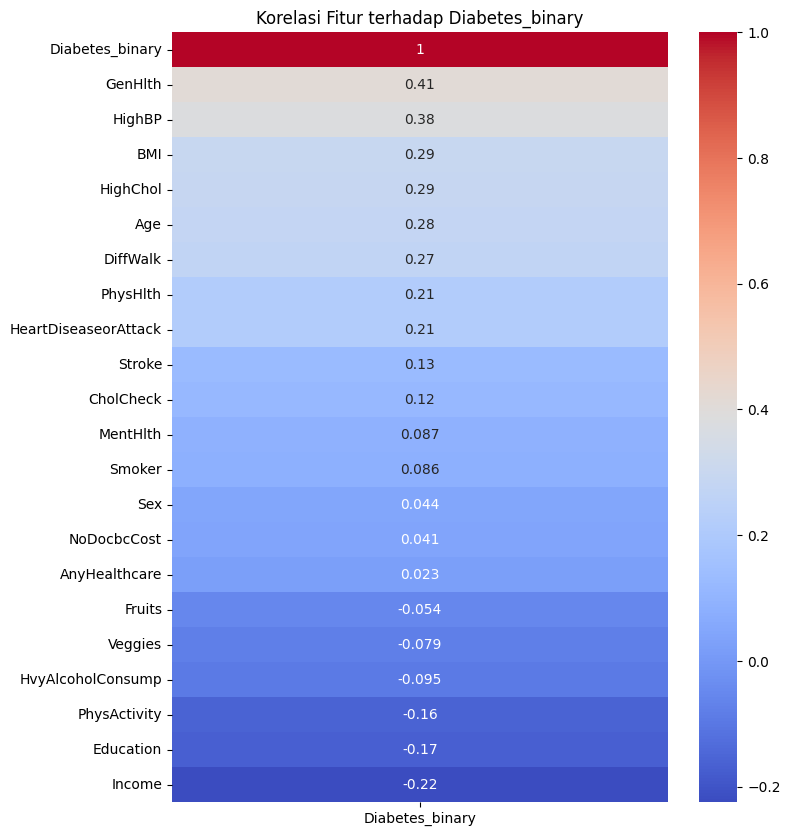

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

cor = df.corr()
cor_target = cor[["Diabetes_binary"]].sort_values(by="Diabetes_binary", ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(cor_target, annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur terhadap Diabetes_binary")
plt.show()

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop(columns=['Diabetes_binary'])
y = df['Diabetes_binary']

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print(selected_features)

Index(['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth',
       'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')


In [7]:
import numpy as np
df_select = df[['Diabetes_binary'] + list(selected_features)].copy()
df_select.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age,Education,Income
0,0.0,1.0,0.0,26.0,0.0,3.0,30.0,0.0,4.0,6.0,8.0
1,0.0,1.0,1.0,26.0,0.0,3.0,0.0,0.0,12.0,6.0,8.0
2,0.0,0.0,0.0,26.0,0.0,1.0,10.0,0.0,13.0,6.0,8.0
3,0.0,1.0,1.0,28.0,0.0,3.0,3.0,0.0,11.0,6.0,8.0
4,0.0,0.0,0.0,29.0,0.0,2.0,0.0,0.0,8.0,5.0,8.0


In [8]:
df_select.duplicated().sum()

np.int64(11754)

In [9]:
df_select = df_select.drop_duplicates()

In [10]:
df_select['Diabetes_binary'].value_counts()

,count
Diabetes_binary,
1.0,32076
0.0,26862


In [11]:
df_select['Diabetes_binary'] = df_select['Diabetes_binary'].astype(int)

<ipython-input-11-8938604e2959>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Diabetes_binary'] = df_select['Diabetes_binary'].astype(int)


In [12]:
df_select.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack',
       'GenHlth', 'PhysHlth', 'DiffWalk', 'Age', 'Education', 'Income'],
      dtype='object')

In [13]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58938 entries, 0 to 70691
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       58938 non-null  int64  
 1   HighBP                58938 non-null  float64
 2   HighChol              58938 non-null  float64
 3   BMI                   58938 non-null  float64
 4   HeartDiseaseorAttack  58938 non-null  float64
 5   GenHlth               58938 non-null  float64
 6   PhysHlth              58938 non-null  float64
 7   DiffWalk              58938 non-null  float64
 8   Age                   58938 non-null  float64
 9   Education             58938 non-null  float64
 10  Income                58938 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 5.4 MB


In [14]:
df_select['Education'].unique()

array([6., 5., 4., 3., 2., 1.])

fitur `education` berdasarkan informasi dataset dengan referensi  BRFSS 2015

| Kode | Tingkat Pendidikan                                                                  |   |
| ---- | ----------------------------------------------------------------------------------- | - |
| 1    | Tidak menyelesaikan sekolah dasar (kurang dari kelas 9)                             |   |
| 2    | Menyelesaikan sekolah dasar (kelas 9–11, tanpa ijazah SMA)                          |   |
| 3    | Lulus SMA atau memiliki GED (General Educational Development)                       |   |
| 4    | Beberapa kuliah atau sekolah kejuruan, tanpa gelar                                  |   |
| 5    | Lulus dari perguruan tinggi dua tahun (Associate degree)                            |   |
| 6    | Lulus dari perguruan tinggi empat tahun atau lebih (Sarjana, Magister, atau Doktor) |   |


fitur `income` berdasarkan informasi dataset dengan referensi  BRFSS 2015 namun disesuaikan dengan demografis indonesia

| BRFSS Income Code | Kategori Sosial Ekonomi (Indonesia) | Keterangan Lokal                             | Kode |
|-------------------|--------------------------------------|----------------------------------------------|------|
| 1 – 2             | Rendah (Lower Class)                | Rentan miskin, pekerjaan informal            | 1    |
| 3 – 5             | Menengah (Middle Class)             | Gaji UMR ke atas, pekerja tetap/karyawan     | 2    |
| 6 – 8             | Tinggi (Upper-Middle to High Class) | Profesional, pengusaha, ekspatriat, pejabat | 3    |


In [15]:
df_select['Income'].unique()

array([8., 7., 6., 3., 4., 1., 5., 2.])

In [16]:
def map_income(indicator):
    if indicator in [1, 2]:
        return 1 # low
    elif indicator in [3, 4, 5]:
        return 2 #'middle'
    elif indicator in [6, 7, 8]:
        return 3 #'high'
    else:
        return 'unknown'  # Untuk jaga-jaga kalau ada nilai yang tidak valid

In [17]:
df_select["Income_Group"] = df_select["Income"].apply(map_income)

In [18]:
df_select.drop(columns=['Income'], inplace=True)
df_select.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age,Education,Income_Group
0,0,1.0,0.0,26.0,0.0,3.0,30.0,0.0,4.0,6.0,3
1,0,1.0,1.0,26.0,0.0,3.0,0.0,0.0,12.0,6.0,3
2,0,0.0,0.0,26.0,0.0,1.0,10.0,0.0,13.0,6.0,3
3,0,1.0,1.0,28.0,0.0,3.0,3.0,0.0,11.0,6.0,3
4,0,0.0,0.0,29.0,0.0,2.0,0.0,0.0,8.0,5.0,3


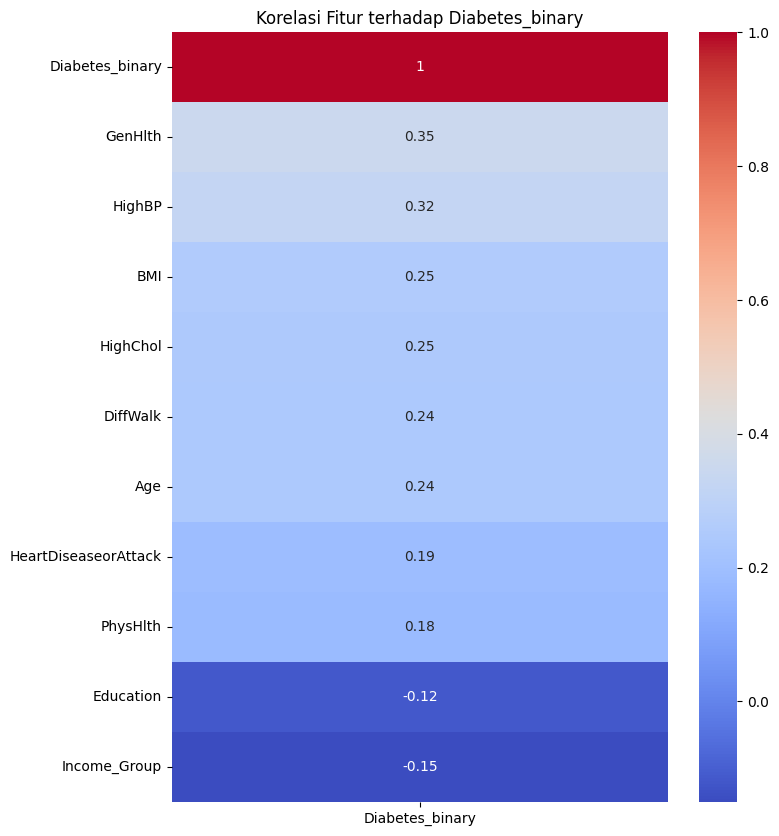

In [19]:
cor = df_select.corr()
cor_target = cor[["Diabetes_binary"]].sort_values(by="Diabetes_binary", ascending=False)

plt.figure(figsize=(8, 10))
sns.heatmap(cor_target, annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur terhadap Diabetes_binary")
plt.show()

In [20]:
# Fitur target
target = 'Diabetes_binary'

# Kolom biner (0 atau 1)
binary_cols = ['HighBP', 'HighChol', 'HeartDiseaseorAttack', 'DiffWalk']

# Kolom ordinal (bertingkat, tapi kategorikal)
ordinal_cols = ['GenHlth', 'Age', 'Education', 'Income_Group']

# Kolom numerik kontinu (harus distandarisasi)
numeric_cols = ['BMI', 'PhysHlth']

In [21]:
df_select[ordinal_cols] = df_select[ordinal_cols].astype(int)

In [22]:
df_select[binary_cols] = df_select[binary_cols].astype(int)

In [23]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58938 entries, 0 to 70691
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       58938 non-null  int64  
 1   HighBP                58938 non-null  int64  
 2   HighChol              58938 non-null  int64  
 3   BMI                   58938 non-null  float64
 4   HeartDiseaseorAttack  58938 non-null  int64  
 5   GenHlth               58938 non-null  int64  
 6   PhysHlth              58938 non-null  float64
 7   DiffWalk              58938 non-null  int64  
 8   Age                   58938 non-null  int64  
 9   Education             58938 non-null  int64  
 10  Income_Group          58938 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 5.4 MB


In [24]:
df_select.head()

,Diabetes_binary,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age,Education,Income_Group
0,0,1,0,26.0,0,3,30.0,0,4,6,3
1,0,1,1,26.0,0,3,0.0,0,12,6,3
2,0,0,0,26.0,0,1,10.0,0,13,6,3
3,0,1,1,28.0,0,3,3.0,0,11,6,3
4,0,0,0,29.0,0,2,0.0,0,8,5,3


### **Data Preprocessing**

In [25]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_select.drop(columns=[target])
y = df_select[target]

# Split data (contoh: 90% train, 10% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [26]:
from sklearn.model_selection import train_test_split

# Split 90% training, 10% validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train,
    test_size=0.1,
    random_state=42,
    stratify=y_train  # opsional: menjaga distribusi label seimbang
)


In [27]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Fit dan transform hanya kolom numerik di train, lalu transform test
X_train_scaled = X_train_final.copy()
X_test_scaled = X_test.copy()
X_val_scaled = X_val.copy()


X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_final[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_val_scaled[numeric_cols] = scaler.transform(X_val[numeric_cols])

In [28]:
X_train_scaled.head()

,HighBP,HighChol,BMI,HeartDiseaseorAttack,GenHlth,PhysHlth,DiffWalk,Age,Education,Income_Group
24590,1,1,1.161296,0,3,-0.365581,0,11,4,3
56445,1,1,1.026317,0,3,-0.648805,0,7,4,3
55786,1,0,1.296275,1,1,-0.648805,1,10,4,2
18933,0,1,0.486399,0,1,-0.648805,0,5,6,3
47064,1,0,0.621379,0,3,-0.648805,0,9,6,3


In [29]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.optimizers import Adam

model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),

    layers.Dense(256, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),

    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,617 (186.00 KB)

 Trainable params: 46,849 (183.00 KB)

 Non-trainable params: 768 (3.00 KB)

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [31]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6
)

In [32]:
history = model.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=50,
    batch_size=32,
    verbose=1,
    class_weight={0: 0.56, 1: 0.55},
    callbacks=[early_stop, reduce_lr]
)

Epoch 1/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6591 - loss: 0.8935 - val_accuracy: 0.7314 - val_loss: 0.8159 - learning_rate: 5.0000e-04
Epoch 2/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7110 - loss: 0.5376 - val_accuracy: 0.7278 - val_loss: 0.6648 - learning_rate: 5.0000e-04
Epoch 3/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7100 - loss: 0.4146 - val_accuracy: 0.7304 - val_loss: 0.6028 - learning_rate: 5.0000e-04
Epoch 4/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7162 - loss: 0.3626 - val_accuracy: 0.7246 - val_loss: 0.5821 - learning_rate: 5.0000e-04
Epoch 5/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7162 - loss: 0.3377 - val_accuracy: 0.7293 - val_loss: 0.5631 - learning_rate: 5.0000e-04
Epoch 6/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7179 - loss: 0.3260 - val_accuracy: 0.7280 - val_loss: 0.5585 - learning_rate: 5.0000e-04
Epoch 7/50
1492/1492 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/s

In [33]:
cnn_loss, cnn_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Loss: {cnn_loss}, Accuracy: {cnn_accuracy}")

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7102 - loss: 0.5658
Loss: 0.5606595873832703, Accuracy: 0.7175093293190002


185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


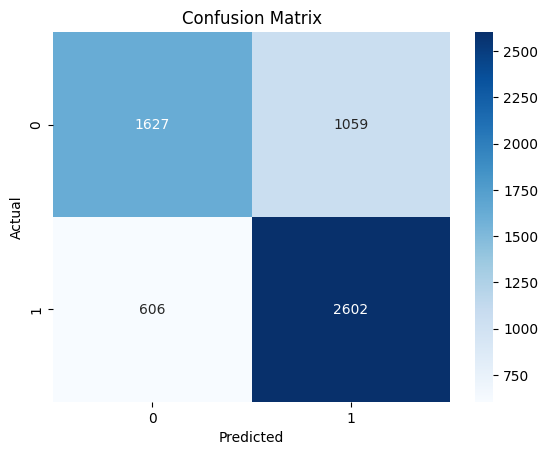

              precision    recall  f1-score   support

           0     0.7286    0.6057    0.6615      2686
           1     0.7107    0.8111    0.7576      3208

    accuracy                         0.7175      5894
   macro avg     0.7197    0.7084    0.7096      5894
weighted avg     0.7189    0.7175    0.7138      5894



In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ambil prediksi probabilitas dari model
y_pred_prob = model.predict(X_test_scaled)

# Karena ini binary classification dengan sigmoid, ubah ke kelas 0 atau 1
y_pred = (y_pred_prob > 0.5).astype("int32").flatten()

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, digits=4))

In [35]:
from sklearn.metrics import roc_auc_score
y_pred_prob = model.predict(X_test_scaled)
print("AUC:", roc_auc_score(y_test, y_pred_prob))

185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC: 0.7850640524526362


## Inference

In [36]:
import pandas as pd
import numpy as np

# Asumsi:
# 1) model sudah dilatih dan siap dipakai
# 2) scaler sudah fit di training data (misal scaler = StandardScaler())
# 3) kamu tahu kolom numerik untuk scaling, misal:
numeric_cols = ['BMI', 'PhysHlth']

def predict_diabetes(input_dict, model, scaler, numeric_cols):
    # Buat DataFrame 1 baris dari dict
    df = pd.DataFrame([input_dict])

    # Pastikan urutan kolom sama dengan data pelatihan (X)
    df = df[X.columns]  # Asumsikan X.columns sesuai training

    # Scaling hanya kolom numerik
    df[numeric_cols] = scaler.transform(df[numeric_cols])

    # Prediksi probabilitas
    prob = model.predict(df).flatten()

    results = []
    for p in prob:
        risk_pct = p * 100
        results.append(
            f"Risiko terkena diabetes diperkirakan sekitar {risk_pct:.1f}%. "
        )
    return results

# Contoh input dictionary
input_example = {
    'HighBP': 1,
    'HighChol': 0,
    'BMI': 27.5,
    'HeartDiseaseorAttack': 0,
    'GenHlth': 3,
    'PhysHlth': 2,
    'DiffWalk': 0,
    'Age': 4,
    'Education': 4,
    'Income_Group': 3
}

result = predict_diabetes(input_example, model, scaler, numeric_cols)
print(str(result[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Risiko terkena diabetes diperkirakan sekitar 29.9%. 


In [37]:
# Simpan model
model.save('model_diabetes.h5')

# Simpan scaler
import joblib
joblib.dump(scaler, 'scaler_diabetes.pkl')

['scaler_diabetes.pkl']

In [38]:
from google.colab import files

files.download('model_diabetes.h5')
files.download('scaler_diabetes.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
!zip -r tfjs_model.zip tfjs_model

  adding: tfjs_model/ (stored 0%)
  adding: tfjs_model/group1-shard1of1.bin (deflated 6%)
  adding: tfjs_model/model.json (deflated 87%)
